Задача:
- выполнить  исследование данных, 
- отобрать признаки, 
- обучить алгоритм линейной регрессии для прогнозирования значений, 
- выполнить прогноз на проверочных данных, 
- снять метрики и ошибки модели. 
- Написать выводы.

Входные данные:
- X1=дата транзакции (например, 2013.250=март 2013, 2013.500=июнь 2013 и т. д.)
- X2=возраст дома (единица: год)
- X3=расстояние до ближайшей станции метро (единица: метр)
- X4=количество магазинов шаговой доступности в жилом районе пешком (целое число)
- X5=географическая координата, широта. (единица: градус)
- X6=географическая координата, долгота. (единица: градус)

Выходные данные следующие
Y=цена дома за единицу площади (10000 новых тайваньских долларов/пинг, где пинг — это местная единица, 1 пинг = 3,3 квадратного метра)
Тип: Числовой (десятичная дробь).

Это географическая долгота местоположения недвижимости. Как и широта, долгота важна для определения расположения недвижимости и её ценности в зависимости от района.

Y house price of unit area:

Тип: Числовой (дробное число).

Это целевая переменная, которую мы хотим предсказать. Она представляет собой цену за единицу площади (например, за квадратный метр или квадратный фут). Это важный показатель стоимости недвижимости, который используется для обучения модели.

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel(r"Regression\Data\Real estate valuation data set.xlsx")

In [120]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [121]:
df.head(3)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3


EDA - исследование данных

In [122]:
# Проверка пропущенных значений
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

Пропузенных значений нет. 

In [123]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


На основе описательных данных мы можем сделать выводы:
- В среднем возраст домов составляет 17,7 лет с разбросом ±11,4 лет.
- Минимальный возраст — 0 лет (новостройки), максимальный — 43,8 лет.
- 25% домов моложе 9 лет, а 25% старше 28 лет.
- Среднее расстояние до станции метро 1083,9 метров. Значения варьируются от 23 метров до 6488 метров. Половина объектов находятся в пределах 492 метров от станции, но 25% домов расположены дальше 1454 метров, что говорит о сильной вариативности.
- В среднем рядом с домом 4 магазина, но число варьируется от 0 до 10.
- 25% объектов имеют 0–1 магазин, тогда как у 25% лучших объектов 6 и более магазинов.
- Дома сосредоточены в узком диапазоне координат (24.932–25.015°N по широте и 121.473–121.566°E по долготе). Небольшое стандартное отклонение указывает на плотную застройку в одном районе.
- Средняя цена — 37,98 с разбросом ±13,6.
- Минимальная цена — 7,6, максимальная — 117,5.
- 25% самых дешёвых квартир стоят 27,7 и ниже, а 25% самых дорогих — 46,6 и выше. Высокая разница между минимумом и максимумом указывает на значительное влияние расположения и характеристик объектов на цену.

Основные наблюдения:
Чем ближе к метро и больше магазинов, тем выше медианная цена. Новый и старый фонд представлены в данных равномерно, но возраст влияет на цену. Цены имеют большой разброс, что может быть связано с локацией, удобствами и состоянием жилья. 

Возможно, есть аномалии (очень низкие и очень высокие цены), которые стоит изучить подробнее.

In [124]:
# Переименование столбцов для удобства
df.columns = ["No", "transaction_date", "house_age", "distance_MRT",
              "convenience_stores", "latitude", "longitude", "price_per_unit"]

In [125]:
# Удаление ненужного столбца "'transaction_date'"
df.drop(columns=["transaction_date"], inplace=True)

In [126]:
# Удаление ненужного столбца "No"
df.drop(columns=["No"], inplace=True)

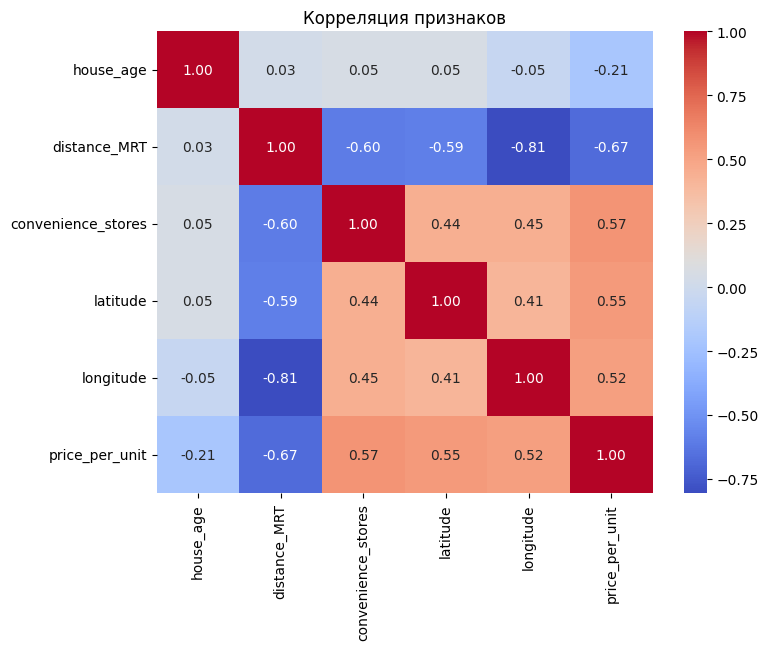

In [127]:
# Визуализация корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция признаков")
plt.show()

Разделение данных на признаки (X) и целевую переменную (y)

In [128]:
X = df.drop(columns=["price_per_unit"])
y = df["price_per_unit"]

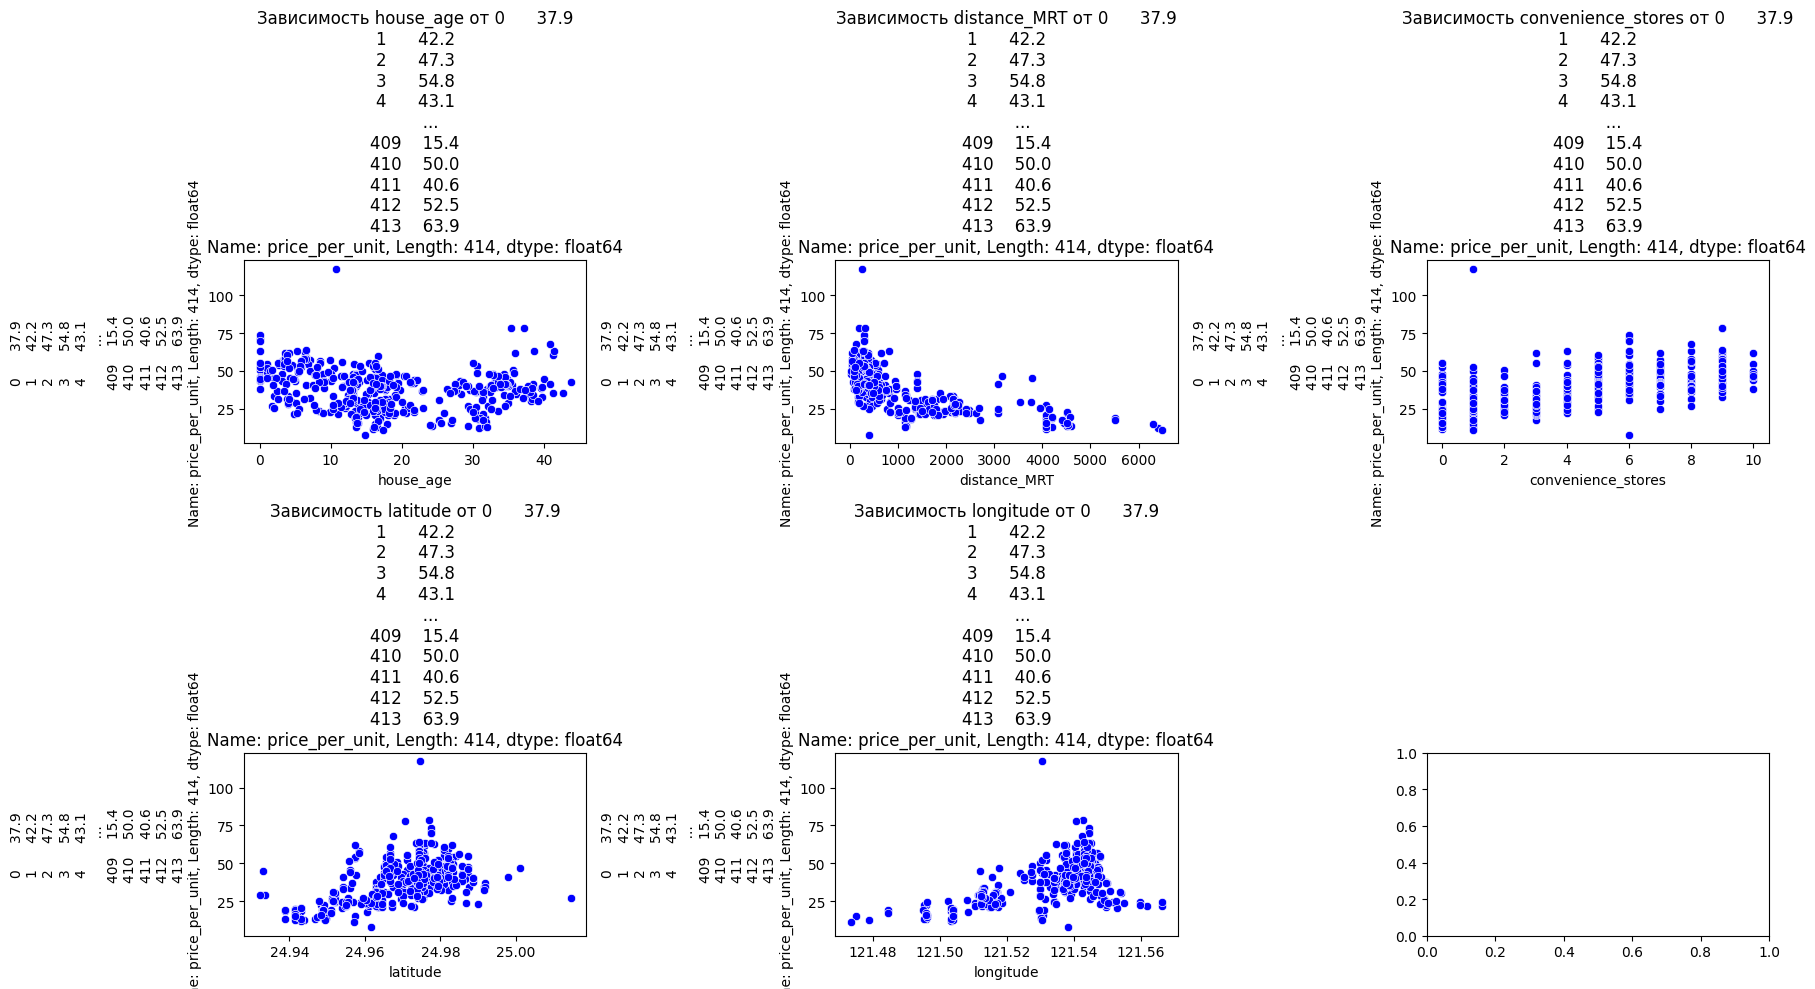

In [129]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # 2 строки, 3 столбца
axes = axes.flatten()  # Преобразуем массив осей в одномерный для удобства

# Проходим по всем независимым переменным и строим графики
for i, var in enumerate(X):
    sns.scatterplot(data=df, x=var, y=y, ax=axes[i], color='blue')
    axes[i].set_title(f'Зависимость {var} от {y}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel(y)

# Настроим компоновку
plt.tight_layout()
plt.show()

In [130]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [131]:
# Разделение данных на обучающую и тестовую выборки (80% - обучение, 20% - тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Проведем масштабирование данных

In [132]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучим модель линейной регрессии

In [133]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Посмотрим на коэффициенты модели

In [134]:
# Коэффициенты модели
print("Коэффициенты модели:", model.coef_)
print("Свободный член (intercept):", model.intercept_)

Коэффициенты модели: [-3.06045213 -5.53623761  3.25926406  2.94298597 -0.35743672]
Свободный член (intercept): 38.39154078549814


Свободный член модели равен 38.39. Это значение отражает цену за единицу площади, когда все другие независимые переменные равны нулю. Хотя нулевая ситуация не всегда имеет практическое значение, этот коэффициент помогает при построении прогноза.

Коэффициенты для каждой переменной:

X2 (house age): Коэффициент -3.063. Это означает, что с увеличением возраста дома на одну единицу (например, на 1 год), цена за единицу площади уменьшается на 3.063. Старые дома обычно стоят дешевле.

X3 (distance to the nearest MRT station): Коэффициент -5.53. Удаленность от станции метро негативно влияет на цену: с увеличением расстояния на одну единицу, цена за квадратный метр жилья снижается на 5.787. Это подтверждает важность близости к общественному транспорту.

X4 (number of convenience stores): Коэффициент 3.26. Увеличение количества магазинов рядом с домом на одну единицу увеличивает цену на 3.219. Это подтверждает, что наличие удобств в районе повышает ценность недвижимости.

X5 (latitude): Коэффициент 2.94. Увеличение широты (то есть перемещение на север) увеличивает цену на 2.94 за квадратный метр. Это может указывать на предпочтение северных районов города.

X6 (longitude): Коэффициент -0.36. Увеличение долготы (перемещение на восток) уменьшает цену на 0.441. Это может означать, что восточные районы города менее востребованы с точки зрения цен.

Основные выводы:
Время и количество магазинов рядом положительно влияют на цену жилья.

Возраст дома и удаленность от метро имеют отрицательное влияние, что логично с точки зрения предпочтений покупателей.

Географическое положение (широта и долгота) также влияет на цену, причем перемещения на север и на запад могут повышать цену, в то время как на восток — снижать.

Настроим гиперпараметры для поиска по сетке

In [135]:
# Параметры для модели Ridge (регуляризация L2)
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100],  # Параметр регуляризации
}

In [136]:
# Параметры для модели Lasso (регуляризация L1)
param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100],  # Параметр регуляризации
}

In [137]:
# Кросс-валидация с GridSearchCV для Ridge
ridge_model = Ridge()
grid_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [138]:
# Кросс-валидация с GridSearchCV для Lasso
lasso_model = Lasso()
grid_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

Выведем лучшие гиперпараметры

In [139]:
print(f"Лучший параметр alpha для Ridge: {grid_ridge.best_params_}")
print(f"Лучший параметр alpha для Lasso: {grid_lasso.best_params_}")

Лучший параметр alpha для Ridge: {'alpha': 10}
Лучший параметр alpha для Lasso: {'alpha': 0.1}


Выберем лучшую модель

In [140]:
# Выбор лучшей модели
best_model = grid_ridge.best_estimator_ if grid_ridge.best_score_ > grid_lasso.best_score_ else grid_lasso.best_estimator_

In [141]:
best_model

Lasso(alpha=0.1)

Проведем прогнозирование на тестовых данных

In [142]:
y_pred = best_model.predict(X_test_scaled)

Проведем оценку качества модели

In [143]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [144]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 5.36
MSE: 54.33
RMSE: 7.37
R²: 0.68


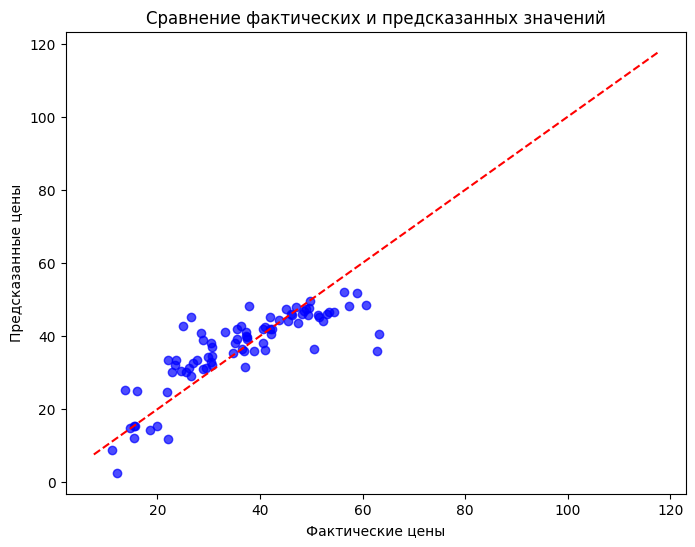

In [145]:
# Визуализация фактических и предсказанных значений
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel("Фактические цены")
plt.ylabel("Предсказанные цены")
plt.title("Сравнение фактических и предсказанных значений")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='dashed')
plt.show()

Модель демонстрирует хорошую точность с R² = 0.68, что означает, что она в значительной степени объясняет изменения цен.

Ошибка на уровне 5.36 (MAE) и 7.37 (RMSE) может быть приемлемой для задачи предсказания цен на жилье, но также можно попытаться улучшить модель, чтобы снизить эти значения.

MSE = 54.33 указывает на присутствие крупных отклонений, что может означать необходимость удаления выбросов или улучшения модели для их обработки.

Для улучшения метрик, можно применить несколько техник. Вот несколько шагов, которые могут помочь улучшить результат:

Добавление полиномиальных признаков: Нелинейные зависимости могут быть полезны для улучшения точности модели.

Использование модели случайного леса (Random Forest) или градиентного бустинга (например, XGBoost или LightGBM), которые могут лучше обрабатывать нелинейные данные.

Оптимизация гиперпараметров модели: Можно использовать более широкий набор гиперпараметров и увеличить количество значений в кросс-валидации.

In [146]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

Добавление полиномиальных признаков

In [147]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

Обучение модели случайного леса

In [148]:
rf_model = RandomForestRegressor(random_state=42)

Подбор гиперпараметров с RandomizedSearchCV

In [149]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

Применение RandomizedSearchCV для случайного леса

In [150]:
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train_poly, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [151]:
# Лучшая модель случайного леса
best_rf_model = random_search.best_estimator_

In [152]:
# Прогнозирование на тестовых данных
y_pred_rf = best_rf_model.predict(X_test_poly)

In [153]:
# Оценка качества модели случайного леса
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [154]:
print(f"MAE (Random Forest): {mae_rf:.2f}")
print(f"MSE (Random Forest): {mse_rf:.2f}")
print(f"RMSE (Random Forest): {rmse_rf:.2f}")
print(f"R² (Random Forest): {r2_rf:.2f}")

MAE (Random Forest): 3.92
MSE (Random Forest): 30.15
RMSE (Random Forest): 5.49
R² (Random Forest): 0.82


Модель Random Forest значительно улучшила точность предсказаний по сравнению с предыдущей моделью, с меньшими ошибками (MAE, RMSE) и более высоким R².

R² = 0.82 говорит о том, что Random Forest объясняет большинство вариаций в ценах на жилье, что делает модель более подходящей для задачи предсказания.

Снижение MAE и RMSE подтверждает, что Random Forest делает более точные предсказания и справляется с отклонениями в данных гораздо лучше.

Визуализация фактических и предсказанных значений для случайного леса

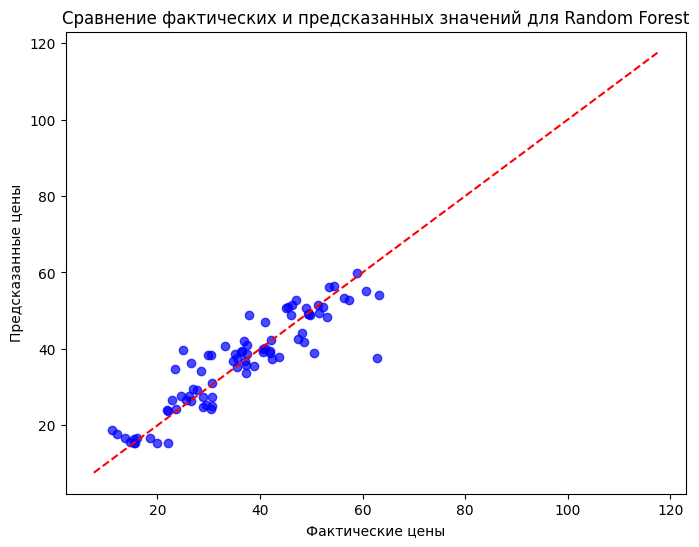

In [155]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='b')
plt.xlabel("Фактические цены")
plt.ylabel("Предсказанные цены")
plt.title("Сравнение фактических и предсказанных значений для Random Forest")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='dashed')
plt.show()

Прогнозирование значений на тестовых данных

In [156]:
new_data = pd.DataFrame({
    'house_age': [10, 5],
    'distance_MRT': [200, 500],
    'convenience_stores': [5, 2],
    'latitude': [24.97, 25.03],
    'longitude': [121.55, 121.57]
})

Теперь вы можете использовать модель для прогнозирования новых данных

Масштабирование новых данных

In [157]:
new_data_scaled = scaler.transform(new_data)

Применение полиномиальных признаков к новым данным

In [158]:
new_data_poly = poly.transform(new_data_scaled)

Прогнозирование

In [159]:
predictions = best_rf_model.predict(new_data_poly)

In [160]:
# Вывод предсказанных значений
print("Предсказанные значения для новых данных:", predictions)

Предсказанные значения для новых данных: [51.0730372  57.76453407]


In [161]:
# 4. Оценка модели (Random Forest)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE (Random Forest): {mae_rf:.2f}")
print(f"MSE (Random Forest): {mse_rf:.2f}")
print(f"RMSE (Random Forest): {rmse_rf:.2f}")
print(f"R² (Random Forest): {r2_rf:.2f}")

MAE (Random Forest): 3.92
MSE (Random Forest): 30.15
RMSE (Random Forest): 5.49
R² (Random Forest): 0.82


Сохраним модель и препроцессинг

In [162]:
import joblib
import os

In [163]:
# 1. Сохраняем модель случайного леса
model_filename = "random_forest_model.pkl"
joblib.dump(best_rf_model, model_filename)

# 2. Сохраняем объекты препроцессинга
scaler_filename = "scaler.pkl"
poly_filename = "poly.pkl"

joblib.dump(scaler, scaler_filename)
joblib.dump(poly, poly_filename)

print(f"Модель и объекты препроцессинга успешно сохранены: {model_filename}, {scaler_filename}, {poly_filename}")

Модель и объекты препроцессинга успешно сохранены: random_forest_model.pkl, scaler.pkl, poly.pkl
